In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np
import os
import pandas as pd 
import matplotlib.pyplot as plt

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN

from collections import Counter

from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

from sklearn import tree
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

import graphviz

/Users/dweepa/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data = pd.read_csv("../Dataset/l1.csv",low_memory=False)
data.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1, inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,case_status,class_of_admission
0,-1.084314,-1.543944,-0.121550,0.557631,2.480155,0.612095,-1.765261,3.132775,0.205846,0.270321,...,-1.324719,0.398405,-0.170750,0.447141,1.880653,-0.835846,0.177200,0.124371,1,1
1,0.546067,-0.653460,-0.286099,0.278774,1.947313,-0.010559,0.556575,0.064187,-1.983113,-0.806337,...,-0.969906,0.042458,-0.670126,0.310786,1.760688,0.688694,-0.445002,-0.914842,1,1
2,-0.414183,1.899536,-0.845571,0.334982,-0.122036,1.726835,-0.045543,-0.458981,0.902509,-0.382026,...,-0.428775,-0.515877,0.668813,-0.848956,0.283728,0.077467,0.362846,-0.272522,1,1
3,-3.118327,0.229138,-0.920722,-0.405977,0.354060,-0.667453,0.943625,-1.322497,-1.982702,-0.811210,...,-0.008942,0.165758,-0.361944,0.098989,0.867169,0.514826,-0.175728,0.113664,1,1
4,-0.939443,-0.064605,0.622334,-2.372281,0.973137,-0.195757,-0.777701,-0.681091,0.446798,-0.382783,...,-0.097251,-0.013605,-0.164361,0.351004,0.477269,0.205390,0.082971,0.115476,1,1


In [3]:
y=data['case_status']
data1=data.drop(['case_status',],axis=1)
X=data1

## Splitting into testing and training and oversampling '0's

In [4]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y, test_size=0.2)

In [5]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train1, y_train1)
print(sorted(Counter(y_resampled).items()))

[(0, 7939), (1, 7939)]


In [6]:
X_train = X_resampled
y_train= y_resampled

In [7]:
print('Train samples count')
a = [i for i in y_train if i==0]
print('0',len(a))
print('1',len(y_train)-len(a))

print('\nTest samples count')
a = [i for i in y_test1 if i==0]
print('0',len(a))
print('1',len(y_train1)-len(a))

Train samples count
0 7939
1 7939

Test samples count
0 21
1 8042


## Neural Networks

In [8]:
classifier = Sequential()
classifier.add(Dense(activation="relu", input_dim=X_train.shape[1], units=6, kernel_initializer="uniform"))
classifier.add(Dense(activation="relu", units=10, kernel_initializer="uniform"))
classifier.add(Dense(activation="relu", units=10, kernel_initializer="uniform"))
classifier.add(Dense(activation="relu", units=10, kernel_initializer="uniform"))
classifier.add(Dropout(0.5))
classifier.add(Dense(activation="relu", units=1, kernel_initializer="uniform"))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 100, epochs = 30,verbose=0)

In [9]:
score= classifier.evaluate(X_test1,y_test1)
print(score)

2016/2016 [==============================] - 0s 53us/step
[0.7780816734783234, 0.4459325396825397]


In [10]:
y_pred=classifier.predict(X_test1)
tn, fp, fn, tp = confusion_matrix(y_test1,y_pred.round(),labels=[1,0]).ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)
fmeasure = 2*((precision*recall)/(precision+recall))

### does not predict everything as '1'

In [11]:
l=len([i for i in y_pred.round() if i==0])
l

1071

## Other Models

In [12]:
seed = 7
# prepare models
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('K Nearest Neighbours', KNeighborsClassifier()))
models.append(('Decision Trees', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))
#models.append(('Support Vector Machine', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

In [13]:
modellist=[]
for name, model in models:
    try:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test1)
        cv_results = round(model.score(X_test1,y_test1),2)
        tn, fp, fn, tp = confusion_matrix(y_test1,y_pred.round(),labels=[1,0]).ravel()
        print(tn, fp, fn, tp)
        precision = round(tp/(tp+fp),2)
        recall = round(tp/(tp+fn),2)
        fmeasure = round(2*((precision*recall)/(precision+recall)),2)
        msg = [name, precision, recall, fmeasure, cv_results]
        modellist.append(msg)
        print(msg)
        print(confusion_matrix(y_test1,y_pred.round(),labels=[0,1]))
    except:
        print(name)


/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1531 464 9 12
['Logistic Regression', 0.03, 0.57, 0.06, 0.77]
[[  12    9]
 [ 464 1531]]
1551 444 10 11
['Linear Discriminant Analysis', 0.02, 0.52, 0.04, 0.77]
[[  11   10]
 [ 444 1551]]


/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


1931 64 19 2
['K Nearest Neighbours', 0.03, 0.1, 0.05, 0.96]
[[   2   19]
 [  64 1931]]
1969 26 20 1
['Decision Trees', 0.04, 0.05, 0.04, 0.98]
[[   1   20]
 [  26 1969]]
1878 117 19 2
['Naive Bayes', 0.02, 0.1, 0.03, 0.93]
[[   2   19]
 [ 117 1878]]


In [14]:
modellist.append(['Neural Networks', round(precision,2), round(recall,2), round(fmeasure,2), round(cv_results,2)])
df = pd.DataFrame(modellist)
df.columns=['Model','Precision','Recall','f-measure','Accuracy']

In [15]:
df

,Model,Precision,Recall,f-measure,Accuracy
0,Logistic Regression,0.03,0.57,0.06,0.77
1,Linear Discriminant Analysis,0.02,0.52,0.04,0.77
2,K Nearest Neighbours,0.03,0.10,0.05,0.96
3,Decision Trees,0.04,0.05,0.04,0.98
4,Naive Bayes,0.02,0.10,0.03,0.93
5,Neural Networks,0.02,0.10,0.03,0.93


In [16]:
df_test = df

# Validation Accuracy 

In [17]:
modellist=[]
for name, model in models:
    try:
        scores = cross_val_score(model, X,y, cv=5)
        names.append(name)
        msg = [name, round(scores.mean(),2),scores.std()]
        modellist.append(msg)
        print(msg)
    except:
        print("Error: ",name)

/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

['Logistic Regression', 0.99, 0.0001977181396396437]


/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


['Linear Discriminant Analysis', 0.98, 0.007725915196578318]
['K Nearest Neighbours', 0.99, 0.0001991457847163315]
['Decision Trees', 0.97, 0.006877253812081934]
['Naive Bayes', 0.96, 0.016564357982115502]


In [18]:
df = pd.DataFrame(modellist)
df.columns=['Model','Mean Validation Score','Std Dev of validation score']
df_validation = df

In [19]:
df_validation

,Model,Mean Validation Score,Std Dev of validation score
0,Logistic Regression,0.99,0.000198
1,Linear Discriminant Analysis,0.98,0.007726
2,K Nearest Neighbours,0.99,0.000199
3,Decision Trees,0.97,0.006877
4,Naive Bayes,0.96,0.016564


In [20]:
df_test

,Model,Precision,Recall,f-measure,Accuracy
0,Logistic Regression,0.03,0.57,0.06,0.77
1,Linear Discriminant Analysis,0.02,0.52,0.04,0.77
2,K Nearest Neighbours,0.03,0.10,0.05,0.96
3,Decision Trees,0.04,0.05,0.04,0.98
4,Naive Bayes,0.02,0.10,0.03,0.93
5,Neural Networks,0.02,0.10,0.03,0.93


# print decision trees

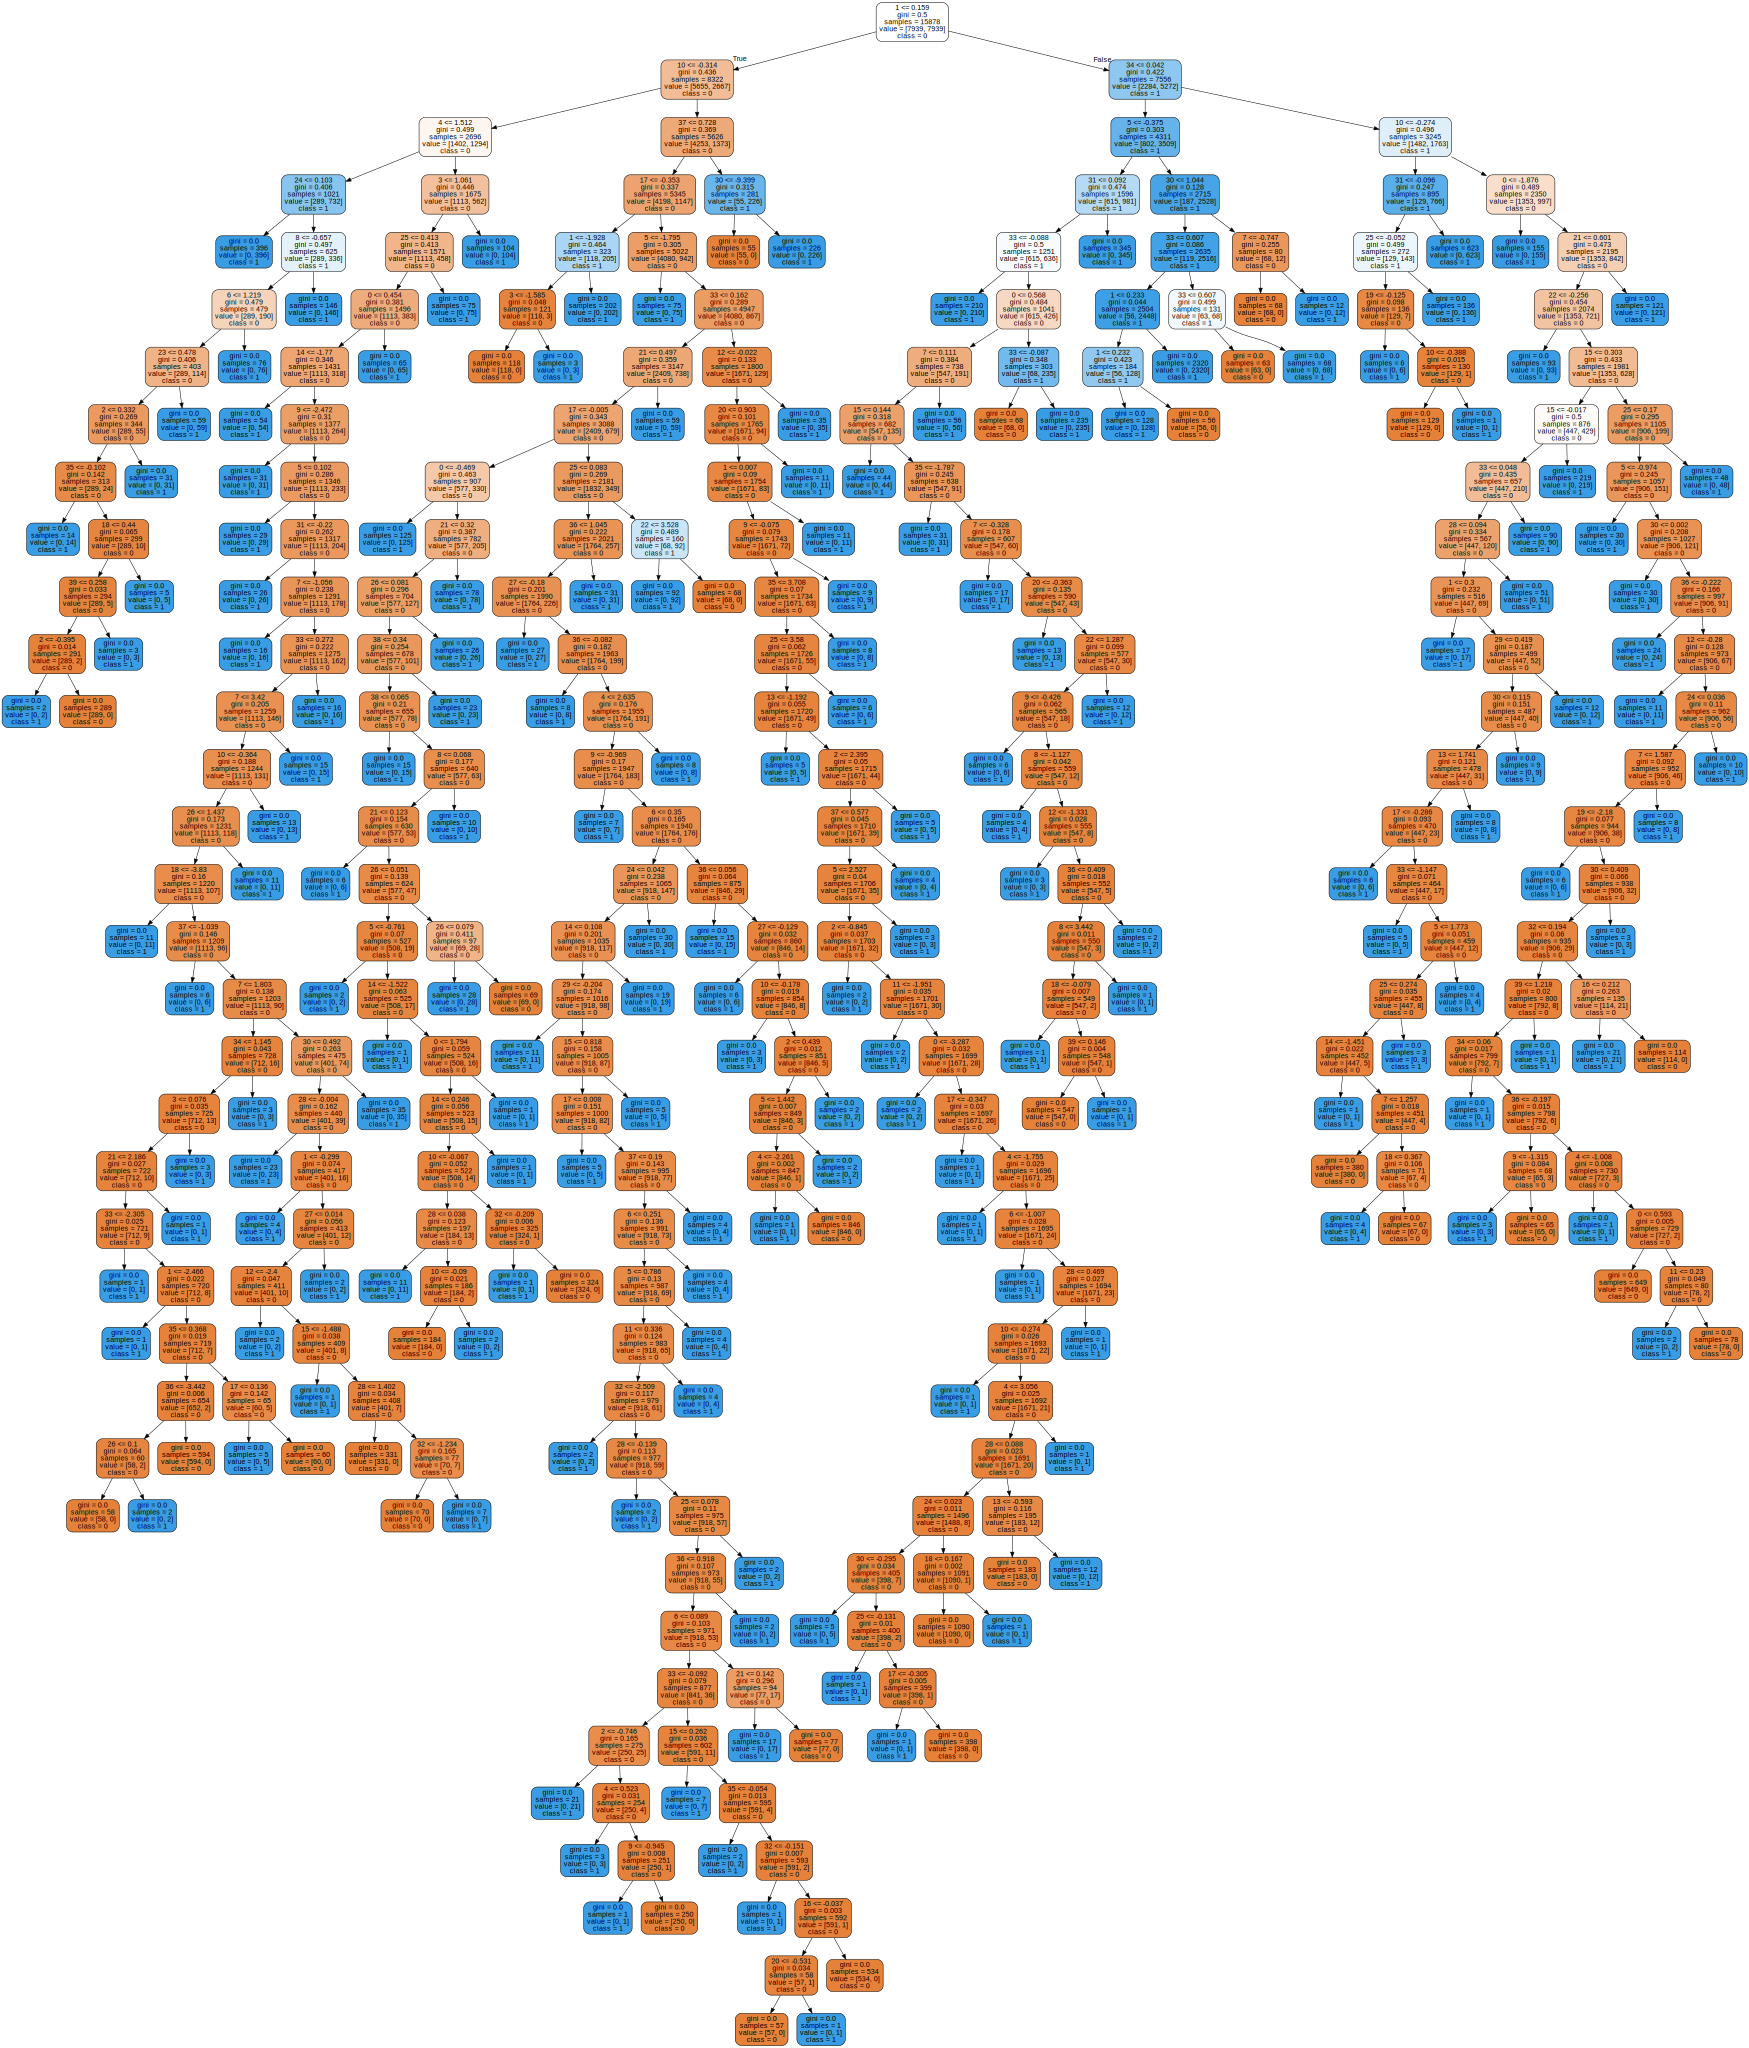

In [21]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.predict(X_test1)
clf.score(X_test1,y_test1)
yu=['0','1']
dot_data = tree.export_graphviz(clf,feature_names=list(X.columns),class_names=yu, filled=True, rounded=True)#,out_file='tree.dot')
graph = graphviz.Source(dot_data) 
graph

In [22]:
graph.render('../DecisionTree/DecisionTreeL1.gv', view=True)  

'../DecisionTree/DecisionTreeL1.gv.pdf'